In [1]:
from functions import *

# Análisis de Carteras

En este proyecto se analizan tres carteras de activos utilizando los precios ajustados de las acciones entre el 01-01-2018 y el 11-12-2024. Las carteras están compuestas por acciones de empresas líderes en el mercado.

El análisis se enfoca en calcular la rentabilidad diaria, el rendimiento medio de las carteras, y la volatilidad de los precios ajustados. A partir de estos cálculos, se generan indicadores financieros clave para evaluar el desempeño de cada cartera.

Finalmente, se utiliza la API de OPENAI para analizar los indicadores financieros de cada cartera y seleccionar la mejor opción de inversión según su rendimiento ajustado al riesgo.

### Descripción de los Indicadores Financieros

- **Rentabilidad Anualizada**: Muestra el retorno promedio anual de una inversión, proyectado a partir de los rendimientos diarios.
  
- **Volatilidad Anualizada**: Mide el riesgo de la inversión a través de la fluctuación de los retornos. Una mayor volatilidad implica mayor riesgo.

- **Ratio de Sharpe**: Indica el retorno ajustado al riesgo, comparando el rendimiento obtenido con la volatilidad asumida.

- **Retorno Acumulado**: Refleja el crecimiento total de la inversión desde su inicio hasta el presente.

- **Máximo Drawdown**: Calcula la mayor caída desde el punto más alto hasta el más bajo, evaluando la pérdida máxima.





In [3]:
cartera_A = ['IBE.MC', 'ITX.MC', 'SAN.MC', 'BBVA.MC', 'CLNX.MC']  #top 5 ibex
cartera_B = ["BTC-USD", "ETH-USD", "XRP-USD", "BNB-USD"] #top 4 criptomonedas
cartera_C = ["AAPL", "MSFT", "AMZN", "GOOGL", "TSLA"] #top 5 wall street

In [4]:
priceAdj_A = importar_datos(cartera_A,"2018-01-01" , "2024-12-11", intervalo="1d")
priceAdj_B = importar_datos(cartera_B, "2018-01-01" , "2024-12-11", intervalo="1d")
priceAdj_C = importar_datos(cartera_C, "2018-01-01" , "2024-12-11", intervalo="1d")

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  5 of 5 completed


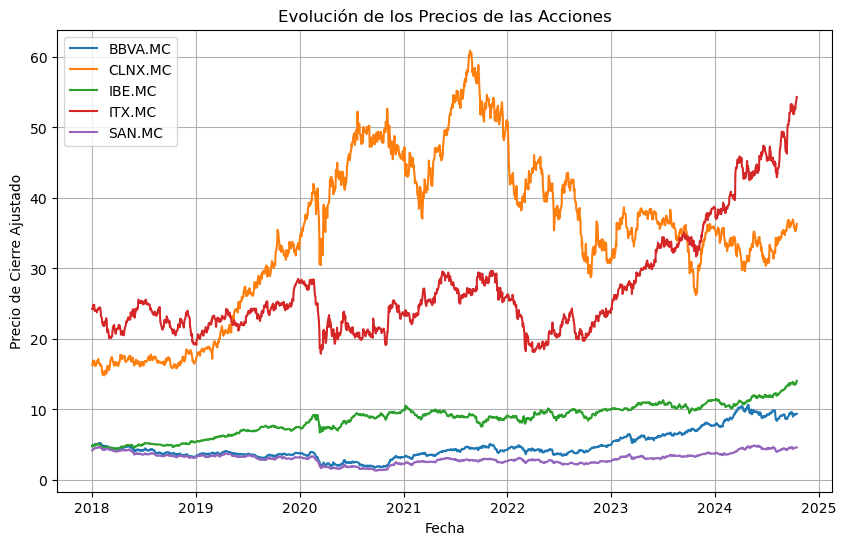

In [5]:
graficar_precios_cierre(priceAdj_A)

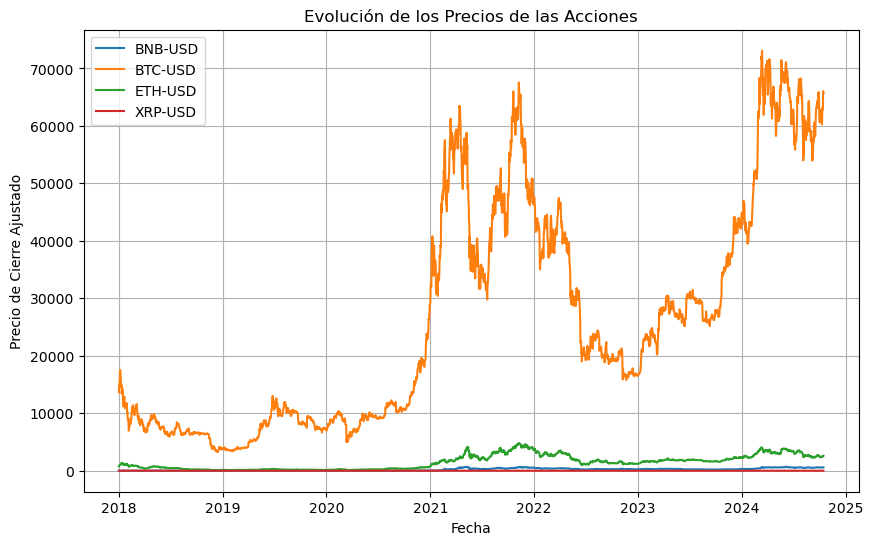

In [6]:
graficar_precios_cierre(priceAdj_B)

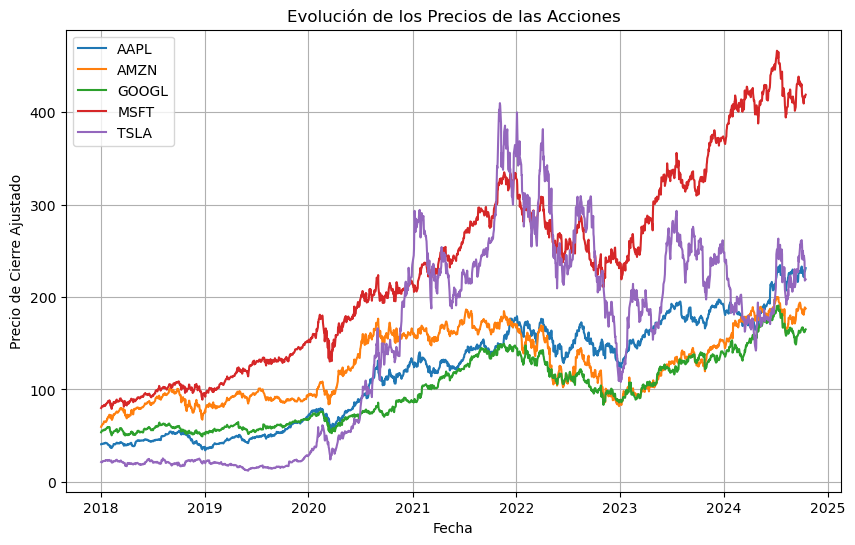

In [7]:
graficar_precios_cierre(priceAdj_C)

In [9]:
rentabilidad_diaria_A = calcular_rentabilidad(priceAdj_A, capital_inicial=100000)
rentabilidad_diaria_B = calcular_rentabilidad(priceAdj_B, capital_inicial=100000)
rentabilidad_diaria_C = calcular_rentabilidad(priceAdj_C, capital_inicial=100000)

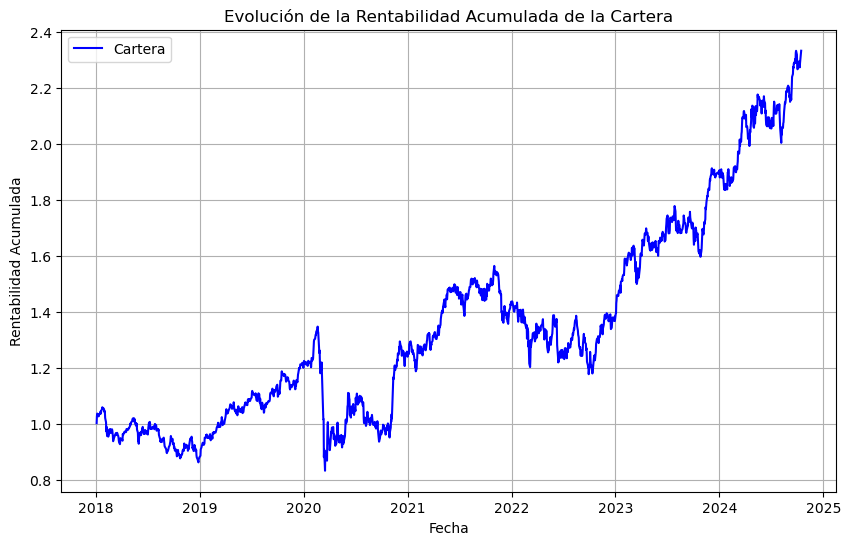

In [10]:
graficar_rentabilidad_cartera(rentabilidad_diaria_A)

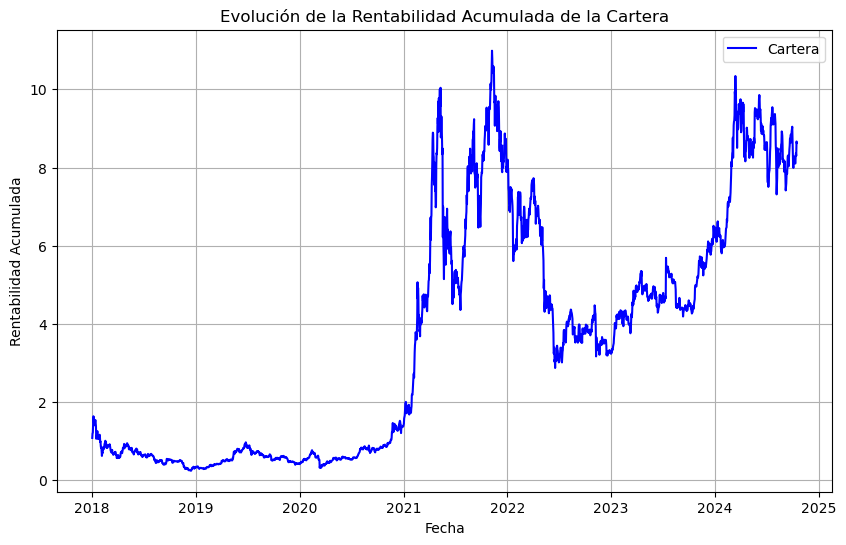

In [11]:
graficar_rentabilidad_cartera(rentabilidad_diaria_B)

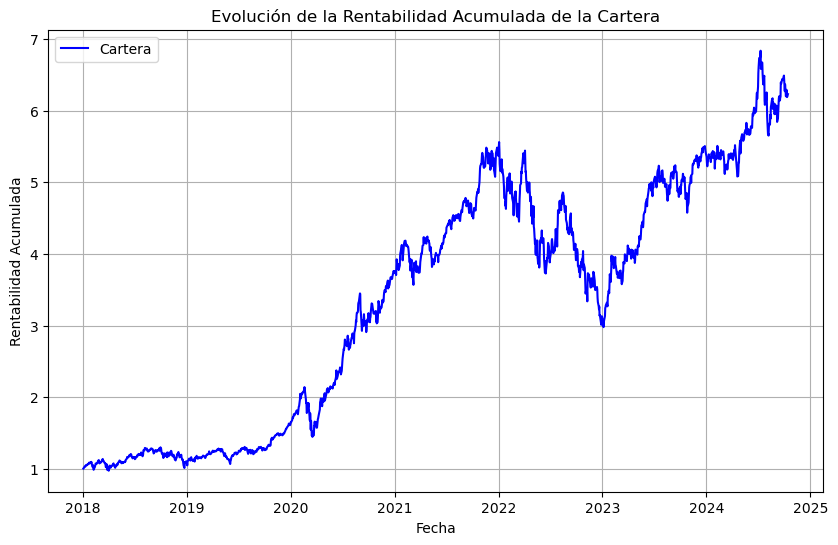

In [12]:
graficar_rentabilidad_cartera(rentabilidad_diaria_C)

In [16]:
ind_carteraA = calcular_indicadores(rentabilidad_diaria_A, dias_trading=252, rendimiento_sin_riesgo=0.01)
ind_carteraB = calcular_indicadores(rentabilidad_diaria_B, dias_trading=252, rendimiento_sin_riesgo=0.01)
ind_carteraC = calcular_indicadores(rentabilidad_diaria_C, dias_trading=252, rendimiento_sin_riesgo=0.01)

In [17]:
df_indicadores_final = pd.DataFrame()

# Asignar los indicadores de cada cartera a una nueva columna
df_indicadores_final['Cartera'] = ['A', 'B', 'C']
df_indicadores_final['Rentabilidad Anualizada'] = [ind_carteraA['Rentabilidad Anualizada'][0],
                                                   ind_carteraB['Rentabilidad Anualizada'][0],
                                                   ind_carteraC['Rentabilidad Anualizada'][0]]
df_indicadores_final['Volatilidad Anualizada'] = [ind_carteraA['Volatilidad Anualizada'][0],
                                                   ind_carteraB['Volatilidad Anualizada'][0],
                                                   ind_carteraC['Volatilidad Anualizada'][0]]
df_indicadores_final['Ratio de Sharpe'] = [ind_carteraA['Ratio de Sharpe'][0],
                                            ind_carteraB['Ratio de Sharpe'][0],
                                            ind_carteraC['Ratio de Sharpe'][0]]
df_indicadores_final['Retorno Acumulado'] = [ind_carteraA['Retorno Acumulado'][0],
                                              ind_carteraB['Retorno Acumulado'][0],
                                              ind_carteraC['Retorno Acumulado'][0]]
df_indicadores_final['Máximo Drawdown'] = [ind_carteraA['Máximo Drawdown'][0],
                                            ind_carteraB['Máximo Drawdown'][0],
                                            ind_carteraC['Máximo Drawdown'][0]]

# Mostrar el DataFrame final
df_indicadores_final

,Cartera,Rentabilidad Anualizada,Volatilidad Anualizada,Ratio de Sharpe,Retorno Acumulado,Máximo Drawdown
0,A,0.155995,0.209951,0.695374,1.331938,-0.382185
1,B,0.528924,0.635604,0.816427,7.626053,-0.851407
2,C,0.370817,0.300439,1.200965,5.229052,-0.464236


**Implementacion OPEN AI para analizar los indicadores financieros**

In [13]:
from dotenv import load_dotenv
import os
import openai

# Load environment variables from a .env file
load_dotenv()

# Retrieve the API key from the environment variables
api_key = os.getenv('apy_key')

In [20]:

# Preparar los datos para la API
indicadores_str = df_indicadores_final.to_string(index=False)

# Establece tu clave de API de OpenAI
openai.api_key = os.getenv('apy_key')

# Solicitud a la API de OpenAI
response = openai.ChatCompletion.create(
    model="gpt-4o-mini",  # Elige GPT-4 o GPT-3.5 según tus necesidades
    messages=[
        {"role": "system", "content": "Eres un experimentado analista financiero y das respuestas consisas ,maximo con 300 caracteres."},
        {"role": "user", "content": f"Analiza y da tu comentario sobre la que consideras la mejor cartera para invertir segun los indicadores financieros en :\n{indicadores_str}"}
    ],
    max_tokens=300,  # Ajusta según la longitud de respuesta deseada
    temperature=0.7,  # Controla la creatividad de la respuesta
)

# Mostrar el resultado
print(response['choices'][0]['message']['content'])

La mejor cartera es la C. Aunque su rentabilidad no es tan alta como la B, su menor volatilidad y el ratio de Sharpe más alto (1.200965) indican un mejor ajuste entre riesgo y retorno. Además, su máximo drawdown es más aceptable que el de B, lo que sugiere menor riesgo en caídas.
